<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/ML_Building_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

In [18]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Database - Banyuwangi.csv to Database - Banyuwangi.csv
Saving Database - Lamongan.csv to Database - Lamongan.csv
Saving Database - Tuban.csv to Database - Tuban.csv


# **Exploratory Data Analysis**

In [21]:
# Input data Kabupaten Lamongan
input_suhu_ratarata_lamongan = []
input_kelembaban_ratarata_lamongan = []
input_curah_hujan_lamongan = []
input_lama_penyinaran_lamongan = []
input_luas_lahan_lamongan = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Lamongan.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata_lamongan.append(float(row[7]))
    input_kelembaban_ratarata_lamongan.append(float(row[10]))
    input_curah_hujan_lamongan.append(float(row[11]))
    input_lama_penyinaran_lamongan.append(float(row[12]))
    input_luas_lahan_lamongan.append(float(row[13]))
    number+=1

In [22]:
# Input data Kabupaten Banyuwangi
input_suhu_ratarata_banyuwangi = []
input_kelembaban_ratarata_banyuwangi = []
input_curah_hujan_banyuwangi = []
input_lama_penyinaran_banyuwangi = []
input_luas_lahan_banyuwangi = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Banyuwangi.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata_banyuwangi.append(float(row[7]))
    input_kelembaban_ratarata_banyuwangi.append(float(row[10]))
    input_curah_hujan_banyuwangi.append(float(row[11]))
    input_lama_penyinaran_banyuwangi.append(float(row[12]))
    input_luas_lahan_banyuwangi.append(float(row[13]))
    number+=1

In [23]:
# Input data Kabupaten Tuban
input_suhu_ratarata_tuban = []
input_kelembaban_ratarata_tuban = []
input_curah_hujan_tuban = []
input_lama_penyinaran_tuban = []
input_luas_lahan_tuban = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Tuban.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata_tuban.append(float(row[7]))
    input_kelembaban_ratarata_tuban.append(float(row[10]))
    input_curah_hujan_tuban.append(float(row[11]))
    input_lama_penyinaran_tuban.append(float(row[12]))
    input_luas_lahan_tuban.append(float(row[13]))
    number+=1

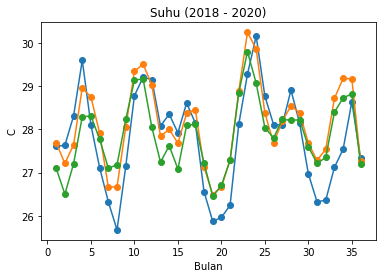

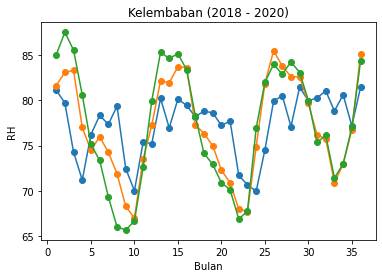

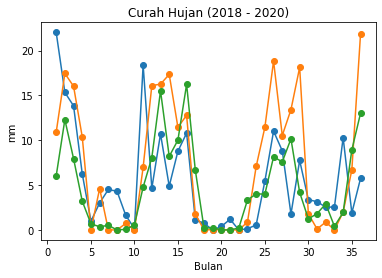

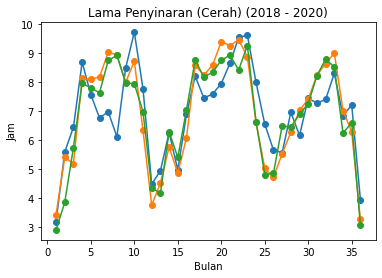

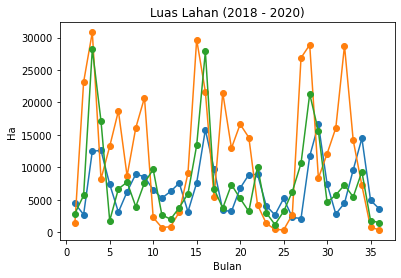

In [24]:
# Grafik perbandingan data 3 Kabupaten

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_ratarata_banyuwangi,marker='o')
plt.plot(number_of_input,input_suhu_ratarata_lamongan,marker='o')
plt.plot(number_of_input,input_suhu_ratarata_tuban,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_ratarata_banyuwangi,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata_lamongan,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata_tuban,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan_banyuwangi,marker='o')
plt.plot(number_of_input,input_curah_hujan_lamongan,marker='o')
plt.plot(number_of_input,input_curah_hujan_tuban,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran_banyuwangi,marker='o')
plt.plot(number_of_input,input_lama_penyinaran_lamongan,marker='o')
plt.plot(number_of_input,input_lama_penyinaran_tuban,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan_banyuwangi,marker='o')
plt.plot(number_of_input,input_luas_lahan_lamongan,marker='o')
plt.plot(number_of_input,input_luas_lahan_tuban,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

In [25]:
# Output data Kabupaten Lamongan
output_total_produksi_beras_lamongan = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Lamongan.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_beras_lamongan.append(float(row[14]))
    number+=1

In [27]:
# Output data Kabupaten Banyuwangi
output_total_produksi_beras_banyuwangi = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Banyuwangi.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_beras_banyuwangi.append(float(row[14]))
    number+=1

In [28]:
# Output data Kabupaten Tuban
output_total_produksi_beras_tuban = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Tuban.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_beras_tuban.append(float(row[14]))
    number+=1

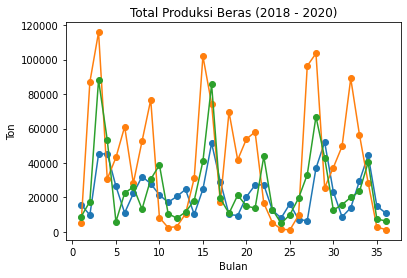

In [30]:
# Grafik perbandingan data 3 Kabupaten

# Grafik garis dari total produksi beras
plt.plot(number_of_output,output_total_produksi_beras_banyuwangi,marker='o')
plt.plot(number_of_output,output_total_produksi_beras_lamongan,marker='o')
plt.plot(number_of_output,output_total_produksi_beras_tuban,marker='o')
plt.title('Total Produksi Beras (2018 - 2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# **Data Prepocessing**

In [3]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[0]))
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    counter+=1

input = np.array(input)

print(input)

[[1.0000e+00 0.0000e+00 0.0000e+00 2.7690e+01 8.1610e+01 1.0880e+01
  3.4400e+00 1.3850e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.7210e+01 8.3070e+01 1.7450e+01
  5.4100e+00 2.3129e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.7640e+01 8.3290e+01 1.6030e+01
  5.2000e+00 3.0824e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.8960e+01 7.7000e+01 1.0370e+01
  8.1400e+00 8.1840e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.8750e+01 7.4480e+01 0.0000e+00
  8.1100e+00 1.3213e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.7910e+01 7.5970e+01 4.6100e+00
  8.1900e+00 1.8685e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.6660e+01 7.4260e+01 0.0000e+00
  9.0400e+00 8.6520e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.6670e+01 7.1900e+01 0.0000e+00
  8.9500e+00 1.6081e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.8050e+01 6.8300e+01 7.2000e-01
  8.0000e+00 2.0726e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.9350e+01 6.7000e+01 0.0000e+00
  8.7300e+00 2.2540e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 2.9510e+01 7.3500e+01 6.9700e+00
  

In [4]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[14]))
    counter+=1

output = np.array(output)

print(output)

[[  5209.48]
 [ 86975.4 ]
 [115862.16]
 [ 30774.59]
 [ 43242.82]
 [ 61068.1 ]
 [ 28292.76]
 [ 52681.05]
 [ 76667.7 ]
 [  8336.23]
 [  2551.31]
 [  3091.78]
 [ 15928.9 ]
 [  9757.82]
 [ 45069.81]
 [ 45451.84]
 [ 26473.66]
 [ 11069.01]
 [ 22321.44]
 [ 32151.33]
 [ 28035.94]
 [ 21473.32]
 [ 17215.7 ]
 [ 20620.07]
 [  8919.26]
 [ 17647.85]
 [ 88166.98]
 [ 53368.58]
 [  5963.89]
 [ 22567.4 ]
 [ 26090.58]
 [ 13280.79]
 [ 30596.29]
 [ 38858.77]
 [ 10700.88]
 [  7964.59]
 [ 10558.09]
 [ 31180.56]
 [101956.71]
 [ 74319.36]
 [ 17322.18]
 [ 69561.05]
 [ 41828.82]
 [ 53880.42]
 [ 58044.09]
 [ 16713.73]
 [  5373.29]
 [  1637.76]
 [ 24683.18]
 [ 10217.73]
 [ 24777.63]
 [ 51528.42]
 [ 29243.91]
 [ 10147.88]
 [  9540.8 ]
 [ 20361.59]
 [ 27265.68]
 [ 27366.8 ]
 [ 12511.74]
 [  8128.77]
 [ 11590.42]
 [ 18216.62]
 [ 41044.27]
 [ 85570.82]
 [ 19437.87]
 [ 10804.02]
 [ 21359.23]
 [ 15103.27]
 [ 13768.52]
 [ 43813.82]
 [ 12969.53]
 [  4995.64]
 [  1194.46]
 [  9610.85]
 [ 96343.8 ]
 [103583.39]
 [ 25728.34]

In [5]:
# Bagi data untuk training, validasi dan testing
split_scaled = 72

input_scaled = input[:split_scaled]
input_test = input[split_scaled:]
output_scaled = output[:split_scaled]
output_test = output[split_scaled:]

print(len(input_scaled))
print(len(input_test))

72
36


In [6]:
# Normalisasi data
split_valid = 36

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])

print(input_train_scaled)
print(input_valid_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])

print(output_train_scaled)
print(output_valid_scaled)

[[1.         0.         0.         0.44104803 0.72981651 0.49342404
  0.07771261 0.03202578]
 [1.         0.         0.         0.33624454 0.79678899 0.79138322
  0.36656891 0.7469832 ]
 [1.         0.         0.         0.430131   0.80688073 0.72698413
  0.33577713 1.        ]
 [1.         0.         0.         0.71834061 0.51834862 0.47029478
  0.76686217 0.25558149]
 [1.         0.         0.         0.67248908 0.40275229 0.
  0.76246334 0.42093841]
 [1.         0.         0.         0.48908297 0.47110092 0.20907029
  0.77419355 0.60086147]
 [1.         0.         0.         0.21615721 0.39266055 0.
  0.89882698 0.27096965]
 [1.         0.         0.         0.21834061 0.28440367 0.
  0.8856305  0.51524019]
 [1.         0.         0.         0.51965066 0.11926606 0.03265306
  0.74633431 0.66797093]
 [1.         0.         0.         0.80349345 0.05963303 0.
  0.85337243 0.06059909]
 [1.         0.         0.         0.83842795 0.35779817 0.31609977
  0.50439883 0.00917371]
 [1.     

In [7]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.005):
      print("The MAE score has reached 0.005")
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
# Model machine learning
model = tf.keras.Sequential([
          tf.keras.layers.Dense(units = 128, activation="relu", input_dim=8),
          tf.keras.layers.Dense(units = 64, activation="relu"),
          tf.keras.layers.Dense(units = 1, activation="relu")
        ])

opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
              loss="mean_absolute_error",
              metrics=['mae'])

model.summary()

fitting_history = model.fit(input_train_scaled, output_train_scaled, epochs = 500, validation_data=(input_valid_scaled,output_valid_scaled), callbacks=[callbacks])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 1s 145ms/step - loss: 0.2593 - mae: 0.2593 - val_loss: 0.2127 - val_mae: 0.2127
Epoch 2/500
2/2 [==============================] - 0s 18ms/step - loss: 0.2271 - mae: 0.2271 - val_loss: 0.2165 - val_mae: 0.2165
Epoch 3/500
2/2 [==============================] - 0s 19ms/step - loss: 0.2280 - mae: 0.2280 - val_loss: 0.1898 - val_mae

<Figure size 432x288 with 0 Axes>

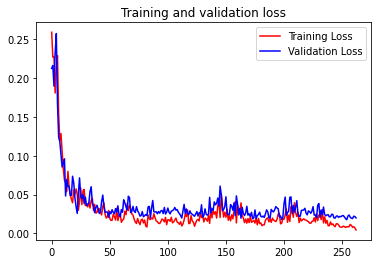

<Figure size 432x288 with 0 Axes>

In [10]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [31]:
# Input dari data validasi
validation_data=[]
number_of_validation=[]
counter=0
number=1

for x in input_valid_scaled:
  validation_data.append([])
  for y in x:
    validation_data[counter].append(y)
  counter+=1
  number_of_validation.append(number)
  number+=1

total_of_validation=len(input_valid_scaled)
print(total_of_validation)
print(number_of_validation)

36
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [32]:
# Output dari data validasi
output_valid_transform=[]
counter=0

for i in output_valid_scaled:
  output_valid_transform.append([])
  for x in i:
    output_valid_transform[counter].append([])
    output_valid_transform[counter][0].append(i[0])
  counter+=1

print(output_valid_transform)

[[[0.07809478535234153]], [[0.2586382594261821]], [[0.8782620000630339]], [[0.6363053778352086]], [[0.13731234307205817]], [[0.5946478160533126]], [[0.35186054818410073]], [[0.457368653282486]], [[0.4938203221028081]], [[0.13198554774636592]], [[0.03270343289174642]], [[0.0]], [[0.20175566691530006]], [[0.07511503671719878]], [[0.2025825480370219]], [[0.4367776061857186]], [[0.24168347568470486]], [[0.07450352113909112]], [[0.06918871974814488]], [[0.16392145636133787]], [[0.22436467164633828]], [[0.22524994659634895]], [[0.09519839894103187]], [[0.05682682509166168]], [[0.08713252159783724]], [[0.1451428941627183]], [[0.3449920507352194]], [[0.7348084997601214]], [[0.1558345677455955]], [[0.08024782795970038]], [[0.17265549217155005]], [[0.11788645858503088]], [[0.10620112690458432]], [[0.3692386215204457]], [[0.09920621163254087]], [[0.02939722160939344]]]


In [33]:
# Prediksi data validasi
output_prediksi=[]
output_validation=[]

for i in range(total_of_validation):
  input_prediksi=[]
  input_prediksi.append([])
  for y in validation_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  prediksi = scaler_output.inverse_transform(prediksi)
  output_prediksi.append(prediksi[0][0])
  valid = scaler_output.inverse_transform(output_valid_transform[i])
  output_validation.append(valid[0][0])

print(output_prediksi)
print(output_validation)

[10560.962, 32791.715, 107835.32, 75940.695, 18807.412, 69854.7, 39927.89, 53699.96, 48097.48, 14148.907, 5220.535, 1637.76, 23695.385, 11294.97, 24029.922, 53893.508, 32452.424, 13016.645, 13412.212, 24722.252, 30478.629, 28436.031, 14139.308, 13030.331, 12835.031, 16288.306, 42034.48, 93283.67, 20361.703, 10934.767, 22537.684, 15773.174, 9673.129, 38897.57, 14065.032, 5944.7334]
[10558.09, 31180.56, 101956.71, 74319.36, 17322.18, 69561.05, 41828.82, 53880.42, 58044.09, 16713.73, 5373.29, 1637.76, 24683.18, 10217.73, 24777.63, 51528.42, 29243.91, 10147.88, 9540.8, 20361.59, 27265.68, 27366.8, 12511.74, 8128.770000000001, 11590.42, 18216.62, 41044.27, 85570.82, 19437.87, 10804.02, 21359.23, 15103.270000000002, 13768.52, 43813.82, 12969.53, 4995.64]


In [34]:
# Split output prediksi dan validasi berdasarkan Kabupaten
output_prediksi_lamongan = output_prediksi[:12]
output_prediksi_banyuwangi = output_prediksi[12:24]
output_prediksi_tuban = output_prediksi[24:36]
output_validation_lamongan = output_validation[:12]
output_validation_banyuwangi = output_validation[12:24]
output_validation_tuban = output_validation[24:36]
number_of_validation = number_of_validation[:12]

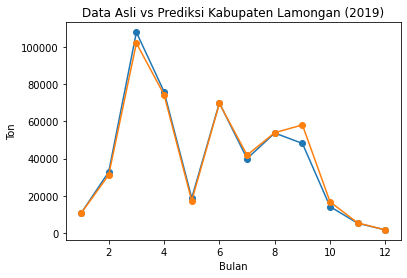

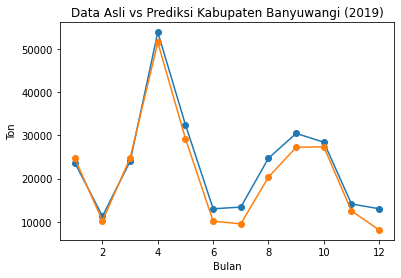

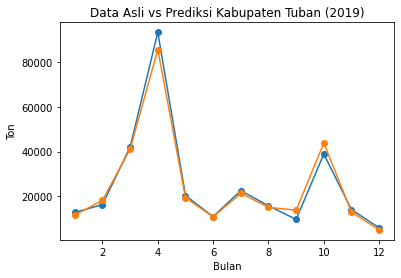

In [35]:
# Grafik garis dari total produksi beras tiap Kabupaten

# Kabupaten Lamongan
plt.plot(number_of_validation,output_prediksi_lamongan,marker='o')
plt.plot(number_of_validation,output_validation_lamongan,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Lamongan (2019)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# Kabupaten Banyuwangi
plt.plot(number_of_validation,output_prediksi_banyuwangi,marker='o')
plt.plot(number_of_validation,output_validation_banyuwangi,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Banyuwangi (2019)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# Kabupaten Tuban
plt.plot(number_of_validation,output_prediksi_tuban,marker='o')
plt.plot(number_of_validation,output_validation_tuban,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Tuban (2019)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

In [36]:
# Input data Konsumsi
input_konsumsi = []
number=1

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input_konsumsi.append(float(row[15]))
    number+=1

input_konsumsi_validation_lamongan = input_konsumsi[36:48]
input_konsumsi_validation_banyuwangi = input_konsumsi[48:60]
input_konsumsi_validation_tuban = input_konsumsi[60:72]

In [37]:
# Output Saran Kabupaten Lamongan
counter=0

for i in output_prediksi_lamongan:
  total_beras_distribusi_lamongan = i - input_konsumsi_validation_lamongan[counter]
  if (total_beras_distribusi_lamongan>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan harus mendistribusikan beras sebesar " +str(total_beras_distribusi_lamongan)+" ke wilayah lain." )
  elif (total_beras_distribusi_lamongan<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_lamongan))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Lamongan harus didistribusikan beras sebesar 222.23511593749936 dari wilayah lain.
Pada bulan 2, Kabupaten Lamongan harus mendistribusikan beras sebesar 23206.65081475 ke wilayah lain.
Pada bulan 3, Kabupaten Lamongan harus mendistribusikan beras sebesar 97052.1232825 ke wilayah lain.
Pada bulan 4, Kabupaten Lamongan harus mendistribusikan beras sebesar 65457.0315325 ke wilayah lain.
Pada bulan 5, Kabupaten Lamongan harus mendistribusikan beras sebesar 8323.748329375 ke wilayah lain.
Pada bulan 6, Kabupaten Lamongan harus mendistribusikan beras sebesar 59371.039345 ke wilayah lain.
Pada bulan 7, Kabupaten Lamongan harus mendistribusikan beras sebesar 29144.693595 ke wilayah lain.
Pada bulan 8, Kabupaten Lamongan harus mendistribusikan beras sebesar 42916.763907500004 ke wilayah lain.
Pada bulan 9, Kabupaten Lamongan harus mendistribusikan beras sebesar 37613.81668875 ke wilayah lain.
Pada bulan 10, Kabupaten Lamongan harus mendistribusikan beras sebesar 3365.710

In [38]:
# Output Saran Kabupaten Banyuwangi
counter=0

for i in output_prediksi_banyuwangi:
  total_beras_distribusi_banyuwangi = i - input_konsumsi_validation_banyuwangi[counter]
  if (total_beras_distribusi_banyuwangi>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi harus mendistribusikan beras sebesar " +str(total_beras_distribusi_banyuwangi)+" ke wilayah lain." )
  elif (total_beras_distribusi_banyuwangi<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_banyuwangi))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 9059.193405625 ke wilayah lain.
Pada bulan 2, Kabupaten Banyuwangi harus didistribusikan beras sebesar 1714.9781434375 dari wilayah lain.
Pada bulan 3, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 9393.730515 ke wilayah lain.
Pada bulan 4, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 39663.877322500004 ke wilayah lain.
Pada bulan 5, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 18222.793338125 ke wilayah lain.
Pada bulan 6, Kabupaten Banyuwangi harus didistribusikan beras sebesar 1212.9859587499996 dari wilayah lain.
Pada bulan 7, Kabupaten Banyuwangi harus didistribusikan beras sebesar 1223.9794459375007 dari wilayah lain.
Pada bulan 8, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 10086.060593125 ke wilayah lain.
Pada bulan 9, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 16248.99841625 ke wilayah lain.
Pada bulan 10, Kabupaten Banyuwangi harus mendist

In [39]:
# Output Saran Kabupaten Tuban
counter=0

for i in output_prediksi_tuban:
  total_beras_distribusi_tuban = i - input_konsumsi_validation_tuban[counter]
  if (total_beras_distribusi_tuban>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban harus mendistribusikan beras sebesar " +str(total_beras_distribusi_tuban)+" ke wilayah lain." )
  elif (total_beras_distribusi_tuban<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_tuban))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Tuban harus mendistribusikan beras sebesar 2199.7929700000004 ke wilayah lain.
Pada bulan 2, Kabupaten Tuban harus mendistribusikan beras sebesar 6834.760528062499 ke wilayah lain.
Pada bulan 3, Kabupaten Tuban harus mendistribusikan beras sebesar 31399.242188750002 ke wilayah lain.
Pada bulan 4, Kabupaten Tuban harus mendistribusikan beras sebesar 82943.856885 ke wilayah lain.
Pada bulan 5, Kabupaten Tuban harus mendistribusikan beras sebesar 10021.888135 ke wilayah lain.
Pada bulan 6, Kabupaten Tuban harus mendistribusikan beras sebesar 594.9516115624992 ke wilayah lain.
Pada bulan 7, Kabupaten Tuban harus mendistribusikan beras sebesar 11902.44531375 ke wilayah lain.
Pada bulan 8, Kabupaten Tuban harus mendistribusikan beras sebesar 5137.935548125 ke wilayah lain.
Pada bulan 9, Kabupaten Tuban harus didistribusikan beras sebesar 666.6860837500008 dari wilayah lain.
Pada bulan 10, Kabupaten Tuban harus mendistribusikan beras sebesar 28262.332032500002 ke wilay

In [40]:
# Simpan model
model.save('model.h5')